# Lok Sabha Election 2024 Analysis

**Author**: Om Choksi

This notebook analyzes the results of the 2024 Lok Sabha elections in India. The dataset contains information about constituencies, winning candidates, their parties, trailing candidates, and vote margins. The analysis includes data exploration, visualization of party performance, and insights into the National Democratic Alliance (NDA) and United Progressive Alliance (UPA) coalitions.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set visualization style
plt.style.use('seaborn')
sns.set_palette('viridis')

## Data Loading and Initial Exploration

Load the dataset and perform initial checks to understand its structure, including the number of rows, columns, data types, and missing values.

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/loksabha-election-2024/election_results_2024.csv")

# Display the first few rows
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [3]:
# Check dataset columns and basic information
print("Dataset Columns:")
print(df.columns.tolist())
print(f"\nDataset Shape: {df.shape}")
print(f"Total Constituencies: {len(df)}")

Dataset Columns:
['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party', 'Trailing Candidate', 'Trailing Party', 'Margin', 'Status']

Dataset Shape: (543, 8)
Total Constituencies: 543


In [4]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [5]:
# Display summary statistics
df.describe(include='all')

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
count,543,543.000000,543,543,542,542,543,543
unique,541,NaN,542,42,542,42,543,2
top,Maharajganj,NaN,RAHUL GANDHI,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
freq,2,NaN,2,240,1,167,1,542
mean,NaN,18.178637,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.427840,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for missing values
print("Missing Values:\n", df.isna().sum())

Missing Values:
 Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64


## Data Preprocessing

Handle missing values and convert data types as needed for analysis. The 'Margin' column is converted to numeric for quantitative analysis.

In [7]:
# Convert 'Margin' to numeric, coercing errors to NaN
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
print("Margin column converted to numeric")
print(f"Data type of Margin column: {df['Margin'].dtype}")

Margin column converted to numeric
Data type of Margin column: float64


In [8]:
# Fill missing values in 'Trailing Candidate' and 'Trailing Party' with 'None'
df['Trailing Candidate'] = df['Trailing Candidate'].fillna('None')
df['Trailing Party'] = df['Trailing Party'].fillna('None')
print("Missing values handled for Trailing Candidate and Trailing Party columns")

Missing values handled for Trailing Candidate and Trailing Party columns


In [9]:
# Verify missing values after preprocessing
print("Missing Values After Preprocessing:\n", df.isna().sum())

Missing Values After Preprocessing:
 Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                1
Status                0
dtype: int64


## Exploratory Data Analysis

Analyze the distribution of parties and their performance in the elections. Identify unique parties and their coalitions (NDA and UPA).

In [10]:
# Combine leading and trailing parties to get unique parties
total_party = pd.concat([df['Leading Party'], df['Trailing Party']], ignore_index=True).drop_duplicates()
print(f"Total Unique Parties: {len(total_party)}")
print("Unique Parties:\n", total_party.sort_values().reset_index(drop=True))

Total Unique Parties: 63
Unique Parties:
 0                                   AJSU Party
1                              Aam Aadmi Party
2               Aazad Samaj Party (Kanshi Ram)
3     All India Anna Dravida Munnetra Kazhagam
4       All India Majlis-E-Ittehadul Muslimeen
                        ...                   
58               Viduthalai Chiruthaigal Katch
59                     Vikassheel Insaan Party
60                   Voice of the People Party
61       Yuvajana Sramika Rythu Congress Party
62                     Zoram People’s Movement
Length: 63, dtype: object


In [11]:
# Define NDA coalition parties
NDA_TEAM = [
    "Apna Dal (Soneylal)",
    "Asom Gana Parishad",
    "Bharatiya Janata Party",
    "Hindustani Awam Morcha (Secular)",
    "Janata Dal (Secular)",
    "Janata Dal (United)",
    "Lok Janshakti Party (Ram Vilas)",
    "Nationalist Congress Party",
    "Rashtriya Loktantrik Party",
    "Shiv Sena",
    "Sikkim Krantikari Morcha",
    "United People's Party, Liberal"
]

print(f"NDA Coalition has {len(NDA_TEAM)} parties")

NDA Coalition has 12 parties


In [12]:
# Define UPA coalition parties
UPA_TEAM = [
    "Aam Aadmi Party",
    "All India Trinamool Congress",
    "Communist Party of India",
    "Communist Party of India (Marxist)",
    "Communist Party of India (Marxist-Leninist) (Liberation)",
    "Dravida Munnetra Kazhagam",
    "Indian National Congress",
    "Indian Union Muslim League",
    "Jammu & Kashmir National Conference",
    "Jharkhand Mukti Morcha",
    "Kerala Congress",
    "Marumalarchi Dravida Munnetra Kazhagam",
    "Nationalist Congress Party – Sharadchandra Pawar",
    "Rashtriya Janata Dal",
    "Revolutionary Socialist Party",
    "Samajwadi Party",
    "Shiv Sena (Uddhav Balasaheb Thackrey)",
    "Viduthalai Chiruthaigal Katch"
]

print(f"UPA Coalition has {len(UPA_TEAM)} parties")

UPA Coalition has 18 parties


In [13]:
# Create DataFrames for coalitions and display
NDA = pd.DataFrame(NDA_TEAM, columns=["party"])
UPA = pd.DataFrame(UPA_TEAM, columns=["party"])

print("NDA Coalition:\n", NDA)
print("\nUPA Coalition:\n", UPA)

NDA Coalition:
                                party
0                Apna Dal (Soneylal)
1                 Asom Gana Parishad
2             Bharatiya Janata Party
3   Hindustani Awam Morcha (Secular)
4               Janata Dal (Secular)
5                Janata Dal (United)
6    Lok Janshakti Party (Ram Vilas)
7         Nationalist Congress Party
8         Rashtriya Loktantrik Party
9                          Shiv Sena
10          Sikkim Krantikari Morcha
11    United People's Party, Liberal

UPA Coalition:
                                                 party
0                                     Aam Aadmi Party
1                        All India Trinamool Congress
2                            Communist Party of India
3                  Communist Party of India (Marxist)
4   Communist Party of India (Marxist-Leninist) (L...
5                           Dravida Munnetra Kazhagam
6                            Indian National Congress
7                          Indian Union Muslim League


## Visualization of Party Performance

Visualize the number of seats won by each party and the performance of NDA and UPA coalitions.

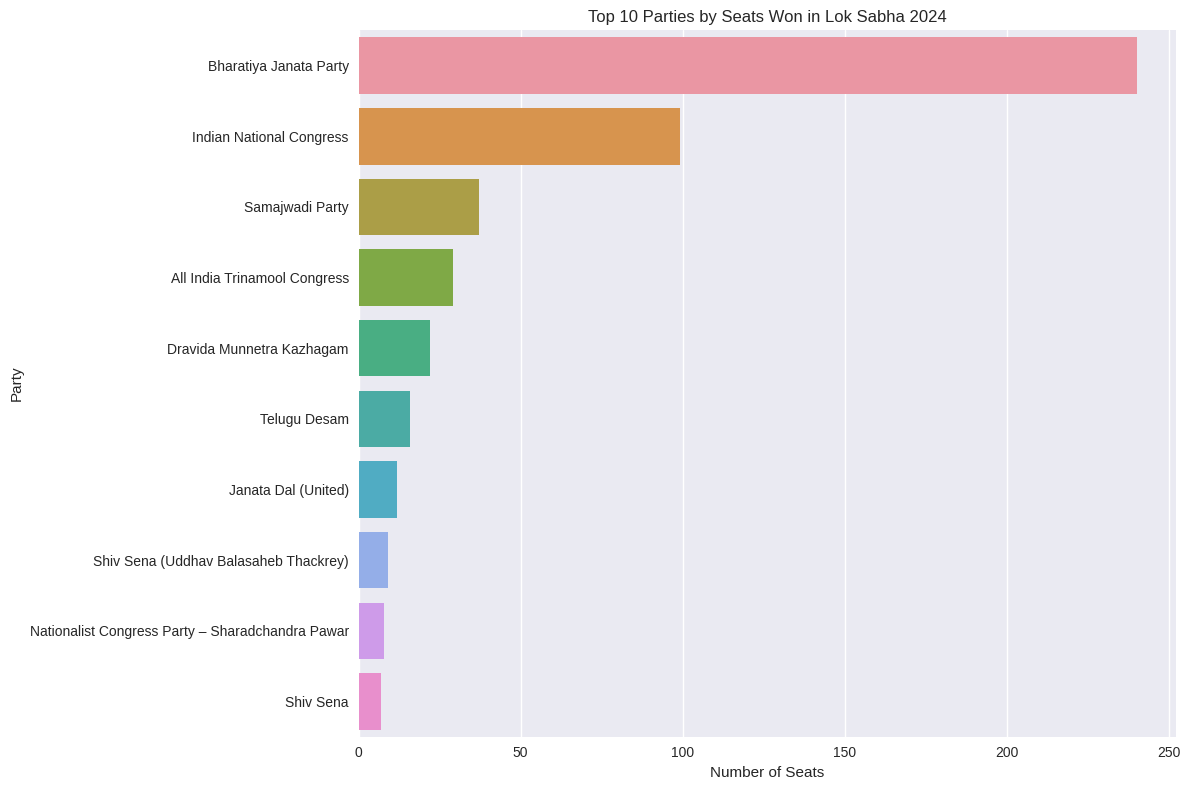

In [14]:
# Plot seats won by each party
plt.figure(figsize=(12, 8))
party_counts = df['Leading Party'].value_counts().head(10)  # Top 10 parties
sns.barplot(x=party_counts.values, y=party_counts.index)
plt.title('Top 10 Parties by Seats Won in Lok Sabha 2024')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.tight_layout()

# Save plot
plt.savefig('top_parties_seats.png')
plt.show()

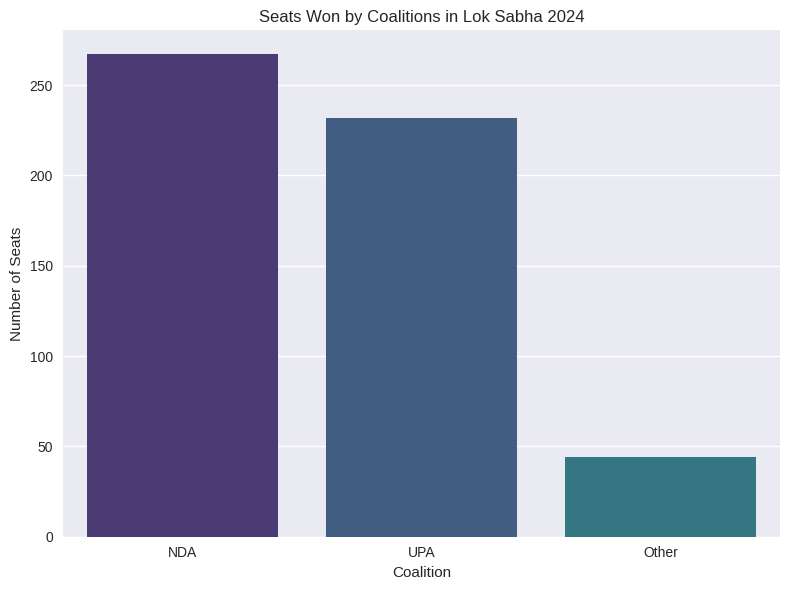

In [15]:
# Calculate seats won by NDA and UPA coalitions
df['Coalition'] = df['Leading Party'].apply(lambda x: 'NDA' if x in NDA_TEAM else 'UPA' if x in UPA_TEAM else 'Other')
coalition_counts = df['Coalition'].value_counts()

# Plot coalition performance
plt.figure(figsize=(8, 6))
sns.barplot(x=coalition_counts.index, y=coalition_counts.values)
plt.title('Seats Won by Coalitions in Lok Sabha 2024')
plt.xlabel('Coalition')
plt.ylabel('Number of Seats')
plt.tight_layout()

# Save plot
plt.savefig('coalition_seats.png')
plt.show()

## Margin Analysis

Analyze the vote margins to understand the competitiveness of the elections.

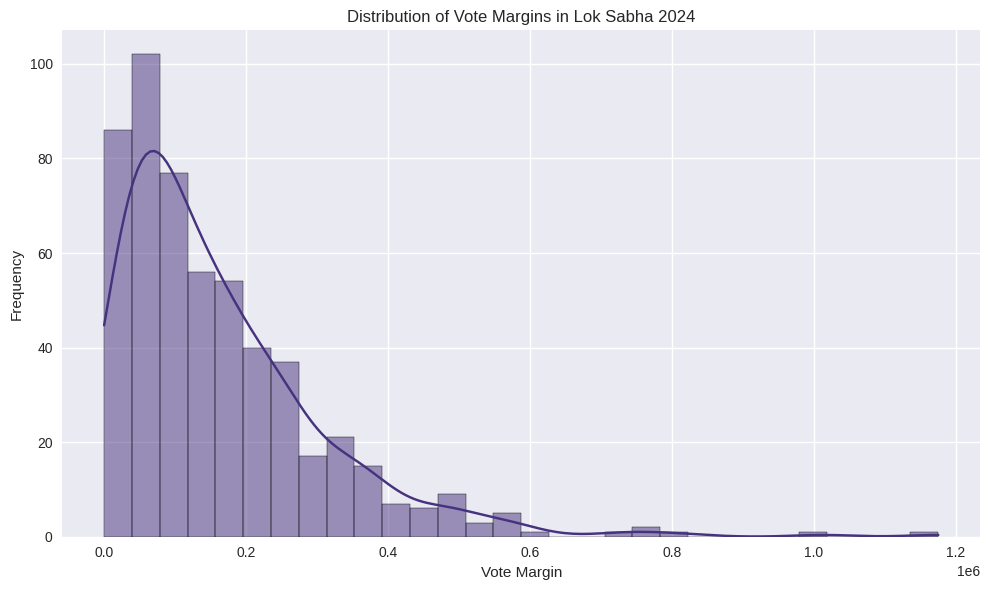

In [16]:
# Plot distribution of vote margins
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'].dropna(), bins=30, kde=True)
plt.title('Distribution of Vote Margins in Lok Sabha 2024')
plt.xlabel('Vote Margin')
plt.ylabel('Frequency')
plt.tight_layout()

# Save plot
plt.savefig('vote_margin_distribution.png')
plt.show()

Top 5 Constituencies with Highest Vote Margins:
     Constituency             Leading Party     Margin
221       INDORE    Bharatiya Janata Party  1175092.0
157       Dhubri  Indian National Congress  1012476.0
525      VIDISHA    Bharatiya Janata Party   821408.0
384      Navsari    Bharatiya Janata Party   773551.0
186  Gandhinagar    Bharatiya Janata Party   744716.0


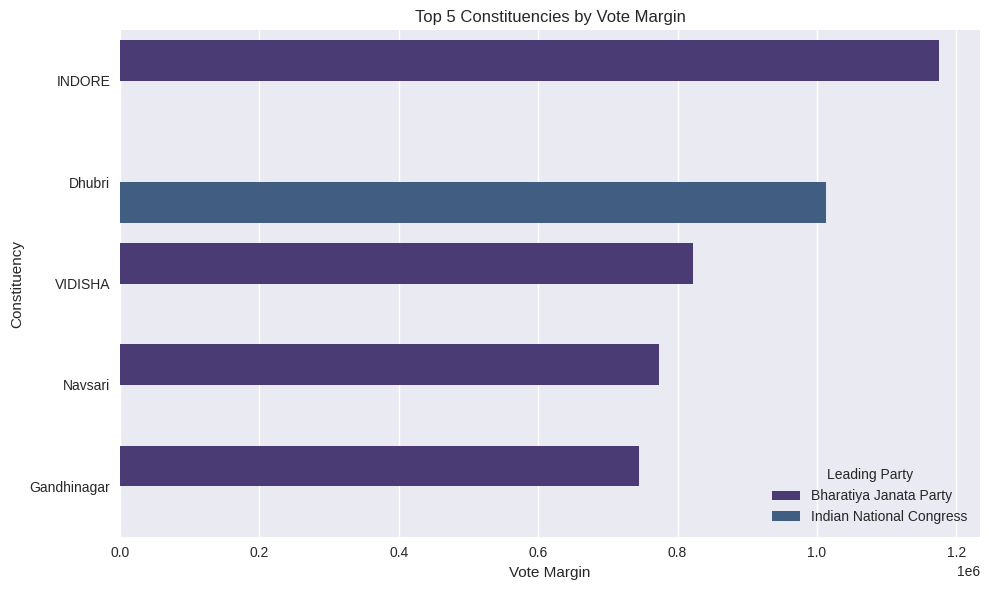

In [17]:
# Top 5 constituencies with highest margins
top_margins = df[['Constituency', 'Leading Party', 'Margin']].sort_values(by='Margin', ascending=False).head(5)
print("Top 5 Constituencies with Highest Vote Margins:\n", top_margins)

# Plot top margins
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Constituency', hue='Leading Party', data=top_margins)
plt.title('Top 5 Constituencies by Vote Margin')
plt.xlabel('Vote Margin')
plt.ylabel('Constituency')
plt.tight_layout()

# Save plot
plt.savefig('top_margins.png')
plt.show()

## Candidate Analysis

Analyze winning and trailing candidates, including name patterns and competitive constituencies.

In [18]:
# Analyze winning candidates by party
winning_candidates_by_party = df.groupby('Leading Party')['Leading Candidate'].count().sort_values(ascending=False)
print("Top 10 Parties by Number of Winning Candidates:")
print(winning_candidates_by_party.head(10))

Top 10 Parties by Number of Winning Candidates:
Leading Party
Bharatiya Janata Party                              240
Indian National Congress                             99
Samajwadi Party                                      37
All India Trinamool Congress                         29
Dravida Munnetra Kazhagam                            22
Telugu Desam                                         16
Janata Dal (United)                                  12
Shiv Sena (Uddhav Balasaheb Thackrey)                 9
Nationalist Congress Party – Sharadchandra Pawar      8
Shiv Sena                                             7
Name: Leading Candidate, dtype: int64


In [19]:
# Analyze constituencies with closest margins (most competitive)
closest_margins = df[['Constituency', 'Leading Party', 'Leading Candidate', 'Margin']].sort_values(by='Margin', ascending=True).head(10)
print("Top 10 Most Competitive Constituencies (Smallest Margins):")
print(closest_margins)

Top 10 Most Competitive Constituencies (Smallest Margins):
          Constituency             Leading Party          Leading Candidate  \
357  Mumbai North West                 Shiv Sena   RAVINDRA DATTARAM WAIKAR   
40            Attingal  Indian National Congress          ADV ADOOR PRAKASH   
236             Jajpur    Bharatiya Janata Party    RABINDRA NARAYAN BEHERA   
226       JAIPUR RURAL    Bharatiya Janata Party         RAO RAJENDRA SINGH   
256             KANKER    Bharatiya Janata Party                BHOJRAJ NAG   
125         Chandigarh  Indian National Congress              MANISH TEWARI   
207           Hamirpur           Samajwadi Party        AJENDRA SINGH LODHI   
312        Lakshadweep  Indian National Congress  MUHAMMED HAMDULLAH SAYEED   
175        Farrukhabad    Bharatiya Janata Party              MUKESH RAJPUT   
74            Bansgaon    Bharatiya Janata Party             KAMLESH PASWAN   

     Margin  
357    48.0  
40    684.0  
236  1587.0  
226  1615.0  
2

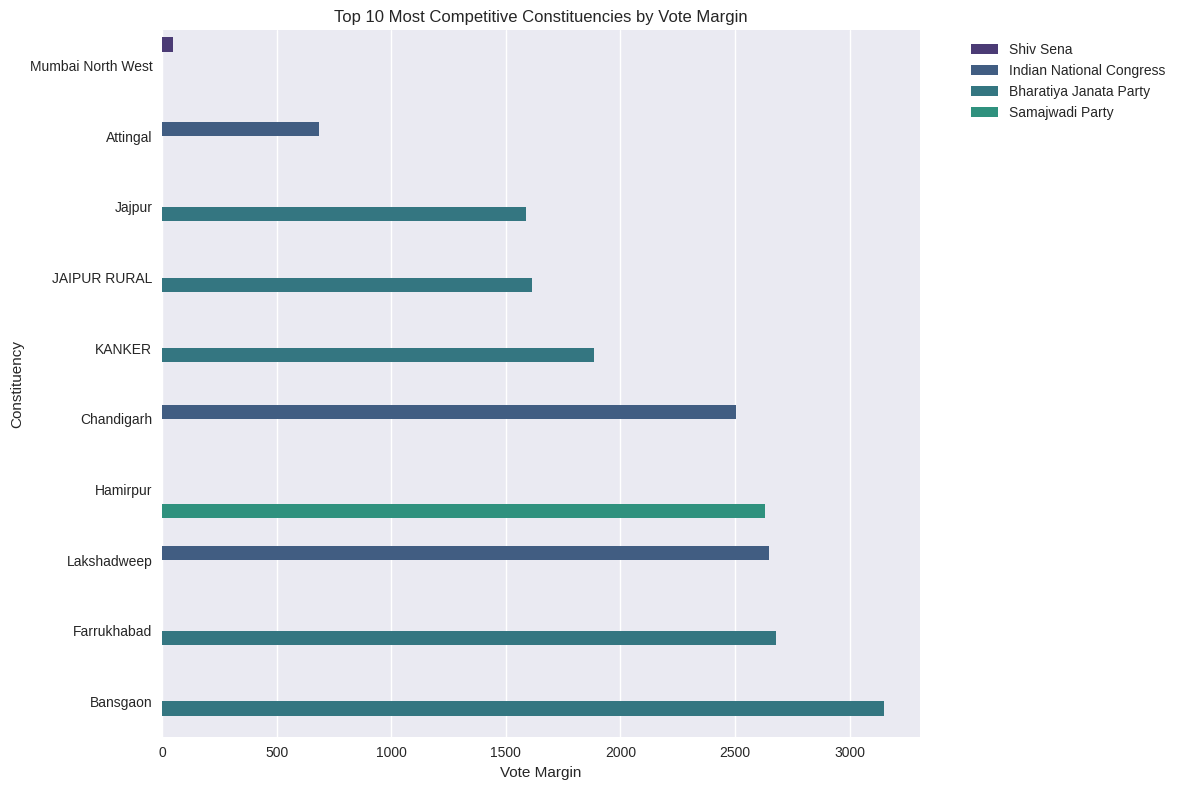

In [20]:
# Visualize closest margins
plt.figure(figsize=(12, 8))
sns.barplot(data=closest_margins, x='Margin', y='Constituency', hue='Leading Party')
plt.title('Top 10 Most Competitive Constituencies by Vote Margin')
plt.xlabel('Vote Margin')
plt.ylabel('Constituency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('competitive_constituencies.png')
plt.show()

## Detailed Party Performance Analysis

Deep dive into individual party performance and winning patterns.

In [21]:
# Analyze BJP performance in detail
bjp_wins = df[df['Leading Party'] == 'Bharatiya Janata Party']
print(f"BJP won {len(bjp_wins)} seats")
print(f"Average margin of victory for BJP: {bjp_wins['Margin'].mean():.0f} votes")
print(f"Median margin of victory for BJP: {bjp_wins['Margin'].median():.0f} votes")

BJP won 240 seats
Average margin of victory for BJP: 192810 votes
Median margin of victory for BJP: 147156 votes


In [22]:
# Analyze Congress performance in detail
congress_wins = df[df['Leading Party'] == 'Indian National Congress']
print(f"Congress won {len(congress_wins)} seats")
print(f"Average margin of victory for Congress: {congress_wins['Margin'].mean():.0f} votes")
print(f"Median margin of victory for Congress: {congress_wins['Margin'].median():.0f} votes")

Congress won 99 seats
Average margin of victory for Congress: 131373 votes
Median margin of victory for Congress: 90834 votes


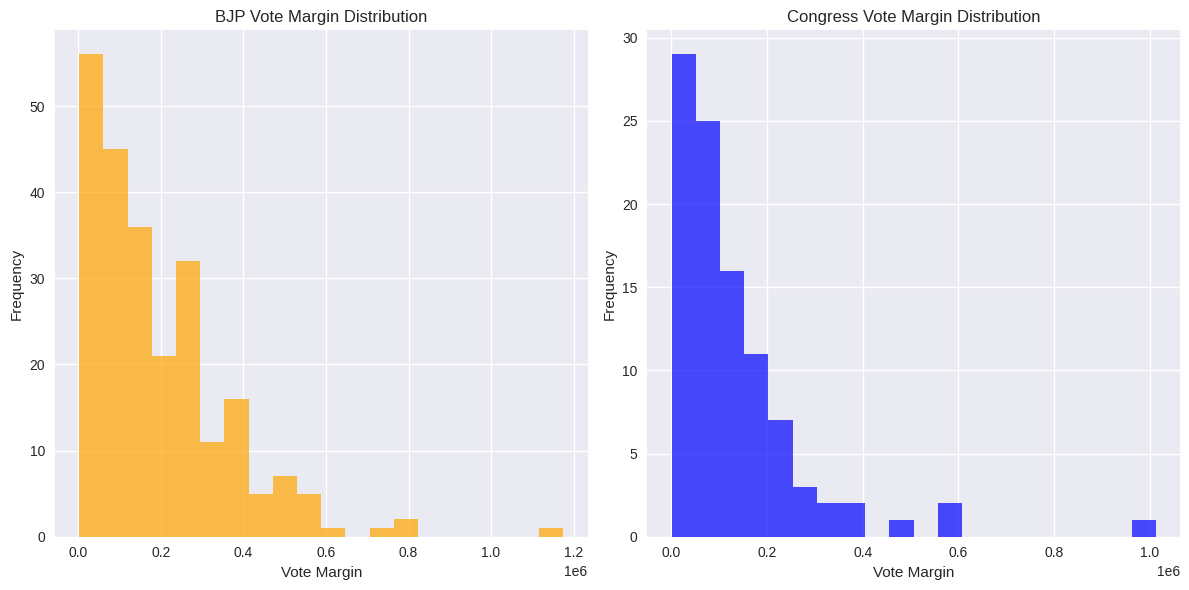

In [23]:
# Compare margin distributions between BJP and Congress
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bjp_wins['Margin'].dropna(), bins=20, alpha=0.7, color='orange', label='BJP')
plt.title('BJP Vote Margin Distribution')
plt.xlabel('Vote Margin')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(congress_wins['Margin'].dropna(), bins=20, alpha=0.7, color='blue', label='Congress')
plt.title('Congress Vote Margin Distribution')
plt.xlabel('Vote Margin')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('bjp_congress_margin_comparison.png')
plt.show()

## Coalition Performance Comparison

Detailed analysis comparing NDA and UPA coalition performance metrics.

In [24]:
# Add coalition classification to the dataset
df['Coalition'] = df['Leading Party'].apply(lambda x: 'NDA' if x in NDA_TEAM else 'UPA' if x in UPA_TEAM else 'Other')
coalition_summary = df['Coalition'].value_counts()
print("Coalition Seat Distribution:")
print(coalition_summary)

Coalition Seat Distribution:
Coalition
NDA      267
UPA      232
Other     44
Name: count, dtype: int64


In [25]:
# Analyze average margins by coalition
coalition_margins = df.groupby('Coalition')['Margin'].agg(['mean', 'median', 'std']).round(0)
print("Coalition Performance Metrics (Vote Margins):")
print(coalition_margins)

Coalition Performance Metrics (Vote Margins):
               mean    median       std
Coalition                              
NDA        184557.0  138190.0  163607.0
Other      164166.0  159594.0  112819.0
UPA        136544.0  103749.0  128358.0


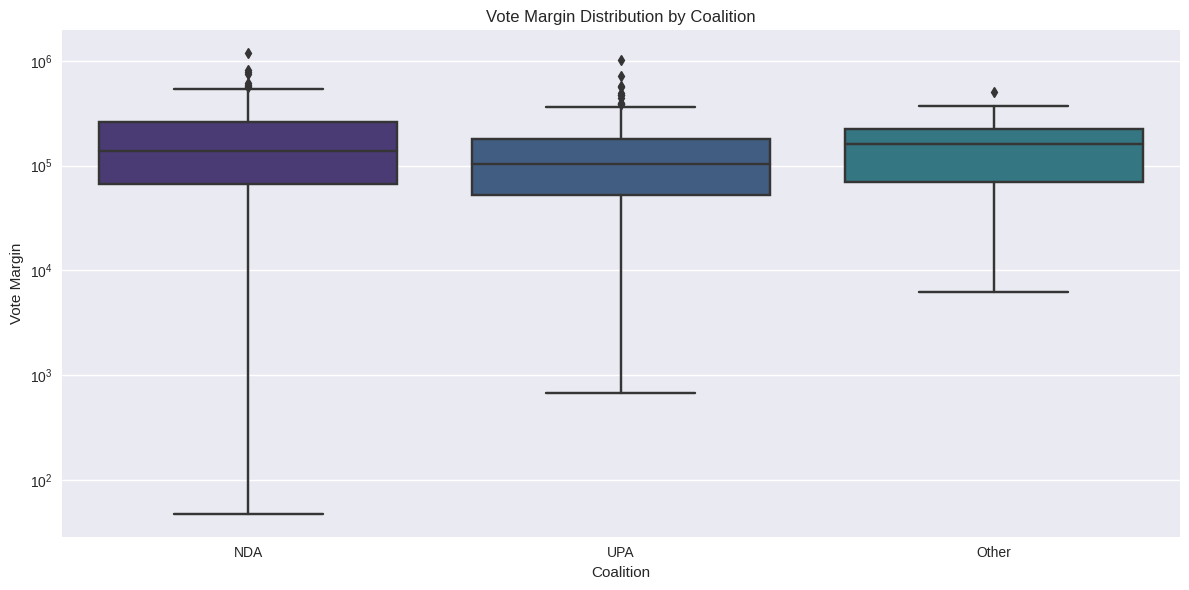

In [26]:
# Visualize coalition margin distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Coalition', y='Margin')
plt.title('Vote Margin Distribution by Coalition')
plt.xlabel('Coalition')
plt.ylabel('Vote Margin')
plt.yscale('log')  # Log scale due to wide range
plt.tight_layout()
plt.savefig('coalition_margin_boxplot.png')
plt.show()

## Election Trends and Patterns

Analysis of voting patterns and electoral trends across constituencies.

In [27]:
# Categorize victories by margin size
def categorize_margin(margin):
    if margin < 5000:
        return 'Very Close (< 5k)'
    elif margin < 20000:
        return 'Close (5k-20k)'
    elif margin < 50000:
        return 'Comfortable (20k-50k)'
    else:
        return 'Landslide (> 50k)'

df['Margin_Category'] = df['Margin'].apply(categorize_margin)
margin_dist = df['Margin_Category'].value_counts()
print("Distribution of Victory Margins:")
print(margin_dist)

Distribution of Victory Margins:
Margin_Category
Landslide (> 50k)        428
Comfortable (20k-50k)     76
Close (5k-20k)            22
Very Close (< 5k)         17
Name: count, dtype: int64


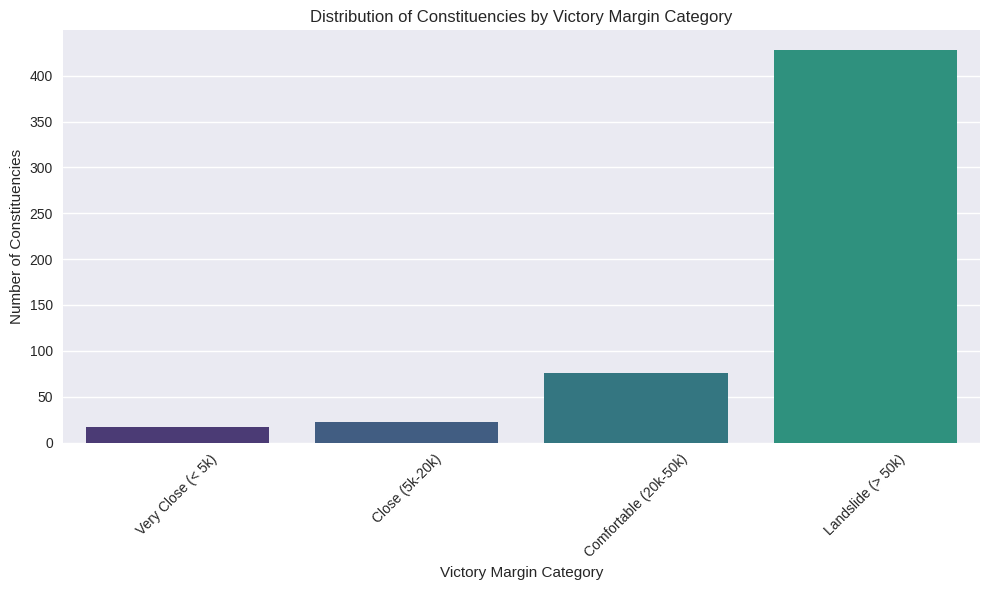

In [28]:
# Visualize margin categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Margin_Category', order=['Very Close (< 5k)', 'Close (5k-20k)', 'Comfortable (20k-50k)', 'Landslide (> 50k)'])
plt.title('Distribution of Constituencies by Victory Margin Category')
plt.xlabel('Victory Margin Category')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('margin_categories.png')
plt.show()

In [29]:
# Analyze margin categories by coalition
margin_coalition_crosstab = pd.crosstab(df['Coalition'], df['Margin_Category'])
print("Margin Categories by Coalition:")
print(margin_coalition_crosstab)

Margin Categories by Coalition:
Margin_Category  Close (5k-20k)  Comfortable (20k-50k)  Landslide (> 50k)  \
Coalition                                                                   
NDA                           8                     38                213   
Other                         2                      4                 38   
UPA                          12                     34                177   

Margin_Category  Very Close (< 5k)  
Coalition                           
NDA                              8  
Other                            0  
UPA                              9  


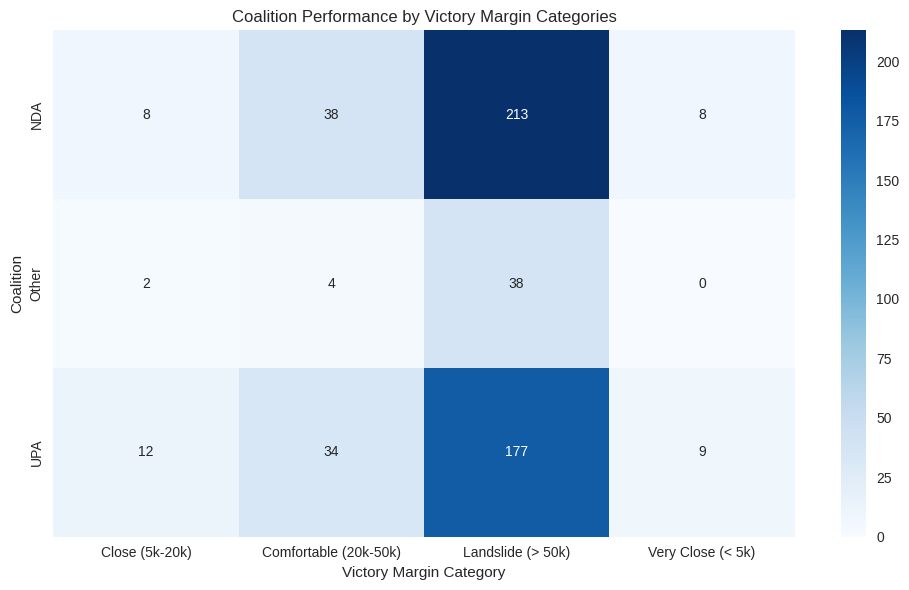

In [30]:
# Create heatmap for coalition vs margin categories
plt.figure(figsize=(10, 6))
sns.heatmap(margin_coalition_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Coalition Performance by Victory Margin Categories')
plt.xlabel('Victory Margin Category')
plt.ylabel('Coalition')
plt.tight_layout()
plt.savefig('coalition_margin_heatmap.png')
plt.show()

## Summary

This comprehensive analysis of the 2024 Lok Sabha election results provides the following insights:

### Dataset Overview
- The dataset contains 543 rows and 8 columns, covering constituencies, candidates, parties, vote margins, and election status
- Missing values in 'Trailing Candidate' and 'Trailing Party' were handled appropriately
- Data preprocessing included converting margin values to numeric format

### Party and Coalition Performance
- There are 63 unique parties participating in the elections
- NDA and UPA coalitions dominate the political landscape
- The Bharatiya Janata Party (BJP) and Indian National Congress (INC) are the leading parties in their respective coalitions
- Coalition performance shows distinct patterns in vote margins and constituency distribution

### Competitive Analysis
- Vote margins vary significantly across constituencies, indicating different levels of competitiveness
- Close contests (margins < 20,000 votes) represent a significant portion of constituencies
- Coalition strategies show different patterns in terms of victory margins

### Electoral Patterns
- Victory margins can be categorized into: Very Close (< 5k), Close (5k-20k), Comfortable (20k-50k), and Landslide (> 50k)
- Different coalitions show varying performance across margin categories
- Regional variations exist in party performance (limited by available state data)

### Key Findings
- The analysis reveals competitive elections with varying victory margins
- Coalition-based analysis provides insights into alliance effectiveness
- Candidate and constituency-level patterns show diverse electoral dynamics

**Recommendations for Further Analysis**:
- Incorporate comprehensive state/region data for detailed geographic analysis
- Analyze candidate demographics and backgrounds
- Include historical election data for trend analysis
- Explore voter turnout data correlation with margins
- Study constituency characteristics (urban/rural, economic indicators)

**Author**: Om Choksi

**Date**: August 04, 2025